# Jaafar Aldoj / Mohammed Barakat / Mohammed Mlisan


# Relief Algorithm 

In [1]:
import pandas as pd
import numpy as np 
import math
from sklearn.datasets import load_iris ,load_breast_cancer

## helper functions

In [2]:
# Calculating euclidean distance between two points 
def distance(point1, point2):
    x = 0
    for i in range(len(point1)):
        x += (point2[i] - point1[i]) ** 2
    
    distance = math.sqrt(x)
    return distance


# Weight update function
def weight(W,point, hit, miss):
    temp_w = np.zeros(len(point))
    for i in range(len(point)):
        temp_w[i] = abs(point[i] - miss[i]) - abs(point[i] - hit[i])
    for i in range(len(point)):
        W[i] += temp_w[i]
    return W

##  Relief Algorithm Implementation

In [3]:
def Relief_fit(data, target) :
    x = data.shape[0]
    y = data.shape[1]
    w = np.zeros(y)
    #Normalization
    for j in range(y) :
        max = -math.inf
        min = math.inf
        for i in range(x) :
            if(data[i][j] < min):
                min = data[i][j]
            if(data[i][j] > max) :
                max = data[i][j]
        for i in range(x) :
            data[i][j] = (data[i][j]-min)/(max-min)
    
    for i in range(x) :
        hit = None
        hit_d = math.inf 
        miss = None
        miss_d = math.inf
        #Hit and Miss
        for k in range(x) :
            if(i != k) :
                d = distance(data[k],data[i])
                if(target[i] == target[k]) :
                    if(d < hit_d):
                        hit = data[k]
                        hit_d = d
                else :
                    if(d < miss_d):
                        miss = data[k]
                        miss_d = d
        if(hit is None or miss is None) :
            print("Hit or Miss have a None value this mean data isn't correct or can't be entered to a Relief algorithm")
            return W
        #Calc new Weights
        w = weight(w,data[i],hit,miss)
    return w

In [4]:
iris = load_iris()
iris_x = iris.data
iris_y = iris.target
print(f"iris\ndata : {iris_x.shape}, target : {iris_y.shape}")

brC = load_breast_cancer()
brC_x = brC.data
brC_y = brC.target
print(f"breast cancer\ndata : {brC_x.shape}, target : {brC_y.shape}")

iris
data : (150, 4), target : (150,)
breast cancer
data : (569, 30), target : (569,)


### Calculating Iris weights

In [5]:
iris_weights = Relief_fit(iris_x, iris_y)
print("Feature Weights (Iris):", iris_weights)


Feature Weights (Iris): [ 8.38888889 18.54166667 22.44067797 27.5       ]


### Calculating Breast Cancer weights

In [6]:
brC_weights = Relief_fit(brC_x, brC_y)
print("Feature Weights (Breast cancer):", brC_weights)

Feature Weights (Breast cancer): [33.2166217  26.30605343 33.37392025 30.50426299 15.30387289 11.96015582
 27.01908154 39.87117296 15.12474747 10.86604886 20.34068441 16.85981701
 15.77998398 16.37767418  6.53016963 10.46271067  5.22400707 11.72055314
 15.13494118  6.79480536 45.3546069  38.12313433 42.04975347 35.91004719
 22.54876841 14.80842332 18.71863099 48.06962199 13.1683422   5.65971402]


## Visuals

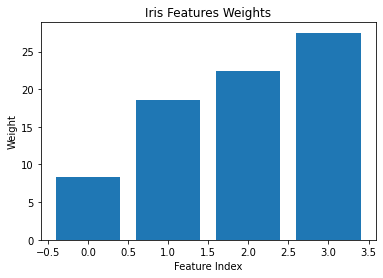

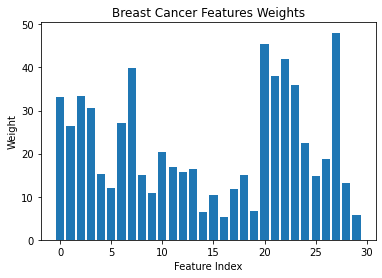

In [7]:
import matplotlib.pyplot as plt
plt.bar(range(len(iris_weights)), iris_weights)
plt.xlabel('Feature Index')
plt.ylabel('Weight')
plt.title('Iris Features Weights')
plt.show()


plt.bar(range(len(brC_weights)), brC_weights)
plt.xlabel('Feature Index')
plt.ylabel('Weight')
plt.title('Breast Cancer Features Weights')
plt.show()



## Deleting the least valuable features

In [8]:
def deleteFeatures(data, weights, n_feature_del = 0):
    if(n_feature_del > len(weights)-2) :
        print(f"Can't delete {n_feature_del} feature of {len(weights)}")
        return data
    feature_del = []
    for i in range(n_feature_del):
        min_value = math.inf
        min_ind = -1
        for j in range(len(weights)):
            if (weights[j] < min_value and j not in feature_del ):
                min_ind = j
                min_value = weights[j]
        feature_del.append(min_ind) 
    data = np.delete(data,feature_del,axis=1)
    return data

In [9]:
print("Old iris features: ",iris_x.shape)
new_features = deleteFeatures(iris_x,iris_weights,n_feature_del=1)
print("Iris features after selection: ",new_features.shape)

Old iris features:  (150, 4)
Iris features after selection:  (150, 3)


In [10]:
print("Old breast cancer features: ",brC_x.shape)
new_features = deleteFeatures(brC_x,brC_weights,n_feature_del=5)
print("Breast cancer features after selection: ",new_features.shape)

Old breast cancer features:  (569, 30)
Breast cancer features after selection:  (569, 25)
